In [10]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from pathlib import Path

# Get root directory 
notebook_dir = Path.cwd()
project_root = notebook_dir.parents[1]

# Append project path to system path for module import
sys.path.append(str(project_root / 'data' / 'raw'))

In [11]:
# Read the hotel reservations CSV file into a DataFrame
base_hotel = pd.read_csv('../../data/raw/hotel_reservations.csv')
# Drop 'Booking_ID' column
base_hotel = base_hotel.drop(columns='Booking_ID')
base_hotel

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [12]:
# Display descriptive statistics for numerical columns
base_hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [13]:
# Check for missing values in each column
base_hotel.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
# Create dummy variables for categorical columns
base_hotel_dummies = pd.get_dummies(base_hotel, columns=[
        'type_of_meal_plan', 'room_type_reserved', 
        'market_segment_type', 'booking_status'
    ])

In [15]:
# Calculate correlation matrix for the DataFrame with dummy variables
base_hotel_dummies.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,...,-0.017421,0.047788,0.051244,-0.093975,-0.072766,-0.287651,-0.082993,0.242919,0.086920,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,...,0.005709,0.650342,0.113705,-0.015375,0.005196,-0.057469,-0.133710,0.154620,0.033078,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,...,-0.005147,0.013736,-0.005334,0.023590,-0.057646,-0.106703,-0.058901,0.116152,0.061563,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,...,-0.000491,0.014763,-0.002457,0.027162,-0.071314,-0.123045,-0.010714,0.080895,0.092996,-0.092996
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,...,-0.004131,0.035641,0.014747,0.005774,0.029095,0.084354,-0.102429,0.049616,-0.086185,0.086185
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,...,-0.025642,-0.046615,-0.037052,-0.054571,-0.088917,-0.179068,0.280103,-0.153570,0.438538,-0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,...,0.023266,0.018498,0.016766,0.027511,-0.047844,-0.042563,-0.163854,0.182180,0.179529,-0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,...,0.002081,0.006624,0.005736,-0.005816,0.010205,-0.025296,0.031059,-0.018776,-0.011233,0.011233
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,...,0.000141,0.018675,0.003816,-0.001594,-0.006916,0.002723,-0.014699,0.014280,0.010629,-0.010629
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,...,0.020904,-0.015997,0.044892,0.038084,0.195898,0.418850,-0.069139,-0.181371,-0.107287,0.107287


In [16]:
# Calculate correlations between columns
correlation_matrix = base_hotel_dummies.corr()
print(correlation_matrix['avg_price_per_room'].sort_values(ascending=False))


avg_price_per_room                      1.000000
room_type_reserved_Room_Type 6          0.371401
no_of_children                          0.337728
market_segment_type_Online              0.335614
no_of_adults                            0.296886
room_type_reserved_Room_Type 4          0.278966
no_of_special_requests                  0.184381
arrival_year                            0.178605
booking_status_Canceled                 0.142569
type_of_meal_plan_Meal Plan 2           0.107218
room_type_reserved_Room_Type 7          0.097593
required_car_parking_space              0.061304
arrival_month                           0.054423
room_type_reserved_Room_Type 5          0.049654
no_of_week_nights                       0.022753
arrival_date                            0.017898
type_of_meal_plan_Meal Plan 1           0.008778
no_of_weekend_nights                   -0.004525
market_segment_type_Aviation           -0.004557
room_type_reserved_Room_Type 3         -0.011777
type_of_meal_plan_Me

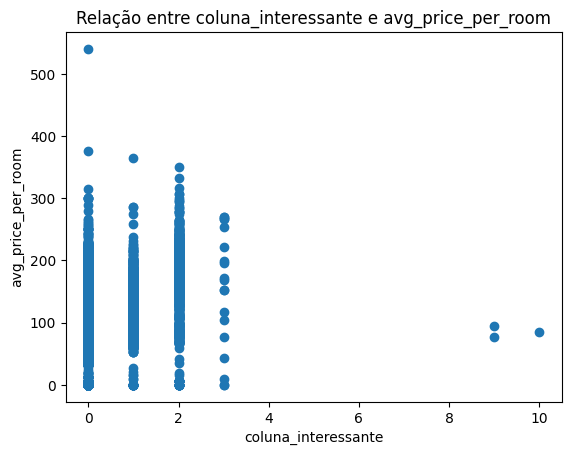

In [17]:
# Scatter plot to visualize relationship between 'no_of_children' and 'avg_price_per_room'
plt.scatter(base_hotel['no_of_children'], base_hotel['avg_price_per_room'])
plt.xlabel('coluna_interessante')
plt.ylabel('avg_price_per_room')
plt.title('Relação entre coluna_interessante e avg_price_per_room')
plt.show()


In [18]:
# Drop categorical columns from the original DataFrame
base_hotel = base_hotel.drop(columns=['type_of_meal_plan', 'room_type_reserved', 
                                        'market_segment_type', 'booking_status'])

<AxesSubplot:>

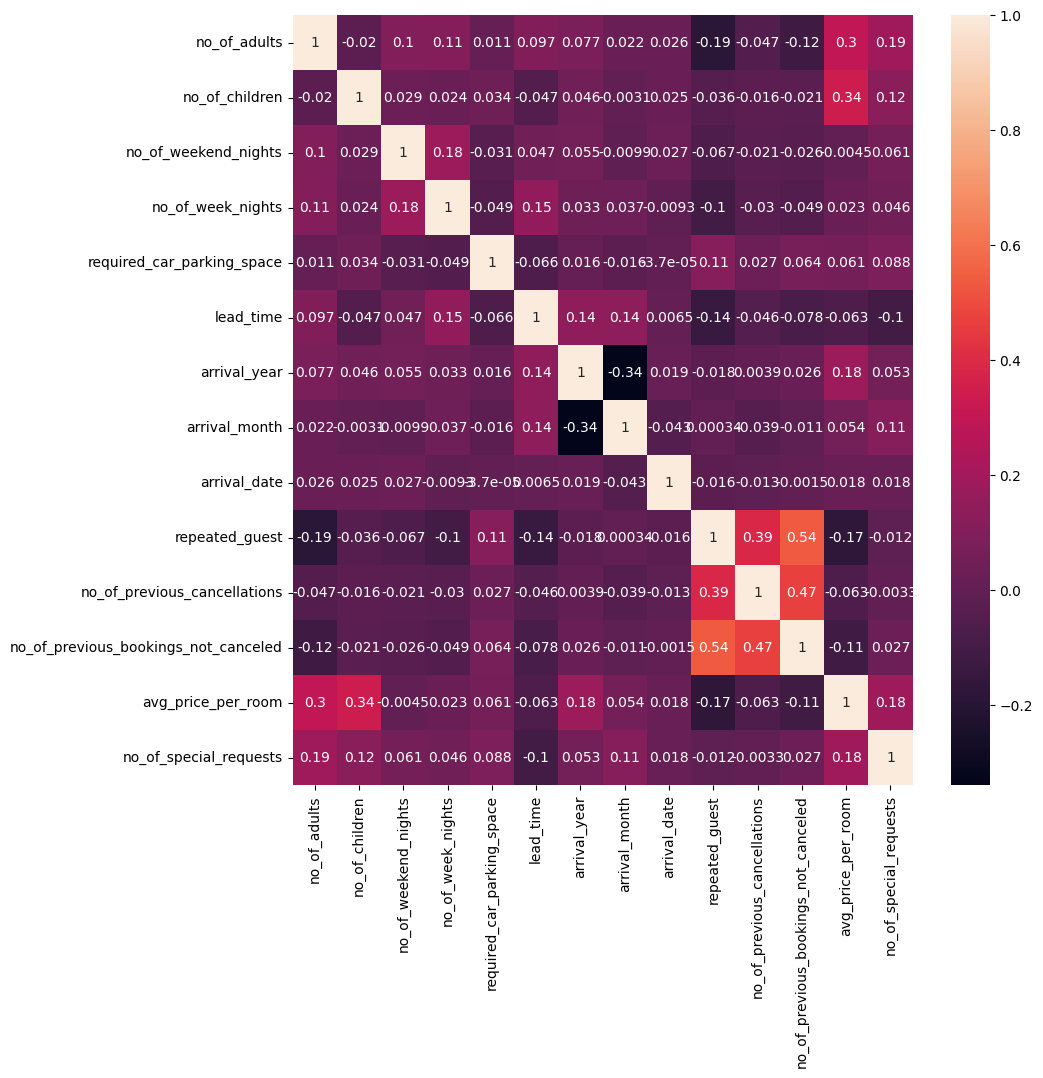

In [19]:
# Create a heatmap to visualize correlations between remaining columns
figura = plt.figure(figsize=(10,10))
sns.heatmap(base_hotel.corr(), annot = True)
